In [321]:
import os

In [322]:
import pandas as pd

In [323]:
import numpy as np

In [324]:
import seaborn as sns

In [325]:
import matplotlib.pyplot as plt
%matplotlib inline

In [326]:
# from sklearn.linear_model import LogisticRegression

# Load data

In [327]:
pwd

'/home/ihor/anaconda_src/ks-challenge/src/main/resources/data'

In [328]:
cd "../resources/data/"

[Errno 2] No such file or directory: '../resources/data/'
/home/ihor/anaconda_src/ks-challenge/src/main/resources/data


In [669]:
#load dataset
tabular_data = pd.read_csv('tabular_data.csv')
#tabular_data.head(10)
print("******* train.csv report *******")
print('Shape: ', tabular_data.shape)
print('Shape w/o NaN: ', tabular_data.dropna(how='any').shape)
print('rows {:d}, unique ids: {:d}'.format(tabular_data.shape[0], tabular_data.id.nunique()))

******* train.csv report *******
Shape:  (61272, 52)
Shape w/o NaN:  (21184, 52)
rows 61272, unique ids: 5106


In [674]:
tabular_data.columns

Index(['id', 'period', 'feature_0', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
       'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13',
       'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18',
       'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23',
       'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28',
       'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33',
       'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38',
       'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43',
       'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48',
       'feature_49'],
      dtype='object')

In [675]:
ids = ['id', 'period']

In [331]:
tabular_data

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,1,110.0,55.0,0.432017,0.000000,176.78,0.0,0.323712,NaN,...,0.00,0,0.000000,0.0,55.0,2.0,0.526552,145.0,133.28,0.0
1,0,2,110.0,110.0,0.397517,0.000000,315.42,0.0,0.316798,NaN,...,0.00,0,0.000000,0.0,110.0,1.0,0.481063,130.0,229.97,0.0
2,0,3,110.0,55.0,0.359440,0.000000,354.55,0.0,0.339188,NaN,...,0.07,0,0.000000,0.0,55.0,1.0,0.509598,180.0,231.78,0.0
3,0,4,110.0,55.0,0.285707,0.000000,229.98,0.0,0.415428,NaN,...,0.00,0,0.000000,0.0,55.0,0.0,0.680089,142.0,183.83,0.0
4,0,5,110.0,55.0,0.101487,444.730391,307.12,0.0,0.569670,NaN,...,0.95,0,20.014485,0.0,55.0,0.0,0.776175,85.0,155.83,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61267,5105,8,110.0,77.0,NaN,0.000000,95.30,0.0,0.094381,221.85,...,-0.00,0,0.000000,0.0,75.0,0.0,0.082128,43.0,83.97,0.0
61268,5105,9,110.0,77.0,NaN,0.000000,61.87,0.0,0.105878,343.22,...,1.75,0,0.000000,0.0,75.0,0.0,0.077594,49.0,48.02,0.0
61269,5105,10,110.0,106.5,NaN,0.000000,88.05,0.0,0.040169,259.33,...,8.27,0,0.000000,0.0,99.0,1.0,0.109053,43.0,74.52,0.0
61270,5105,11,110.0,45.0,NaN,0.000000,98.40,0.0,0.040810,222.00,...,0.00,0,0.000000,0.0,0.0,0.0,0.101929,35.0,25.83,0.0


In [332]:
#load train data
train = pd.read_csv('train.csv')
train.head(10)

,id,target
0,0,0
1,1,0
2,2,1
3,3,0
4,4,1
5,5,0
6,6,1
7,7,0
8,8,1
9,9,0


In [333]:
print("******* train.csv report *******")
print('rows {:d}, unique ids: {:d}, unique targets {:d}'.format(train.shape[0], train.id.nunique(), train.target.nunique()))
print('NaN count:')
print(train.isna().sum())
val_counts = train.target.value_counts()
print('Target value counts:\n', val_counts)
print('Class_1 probability = ', val_counts[1] / val_counts.sum())

******* train.csv report *******
rows 4084, unique ids: 4084, unique targets 2
NaN count:
id        0
target    0
dtype: int64
Target value counts:
 0    3009
1    1075
Name: target, dtype: int64
Class_1 probability =  0.26322233104799214


# Cleaning and formatting

### Encode object values (feature_25)

In [722]:
df_to_encode = tabular_data
print('Object features:')
features_to_encode = df_to_encode.dtypes[df_to_encode.dtypes == 'O'].drop(columns=ids).index
features_to_encode

Object features:


Index(['feature_25'], dtype='object')

In [728]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#NaN should be encoded as another value
for feature in features_to_encode:
    encoded_data[feature + "_encoded"] = le.fit_transform(df_to_encode[feature].fillna('__NaN__'))
    print(feature + " has been encoded")
encoded_data = encoded_data.drop(columns=features_to_encode, errors='ignore')   
# encoded_data

feature_25 has been encoded


### Delete splashes

In [767]:
splashed_data = encoded_data
unsplashed_data = splashed_data[splashed_data.columns.drop(['id', 'period'])]
mean_std = pd.DataFrame({'mean':splashed_data.mean(), 'std':splashed_data.std()})
mean_std['m_left'] = mean_std['mean'] - 3*mean_std['std']
mean_std['m_right'] = mean_std['mean'] + 3*mean_std['std']
unsplashed_data = splashed_data[{'id', 'period'}] \
    .join(unsplashed_data[ (unsplashed_data > mean_std['m_left']) & (unsplashed_data < mean_std['m_right']) ])
# unsplashed_data

,period,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_25_encoded
0,1,0,110.0,55.0,0.432017,0.000000,176.78,0.0,0.323712,NaN,...,NaN,0.000000,0.0,55.0,2.0,0.526552,145.0,133.28,0.0,7
1,2,0,110.0,110.0,0.397517,0.000000,315.42,0.0,0.316798,NaN,...,NaN,0.000000,0.0,110.0,1.0,0.481063,130.0,229.97,0.0,7
2,3,0,110.0,55.0,0.359440,0.000000,354.55,0.0,0.339188,NaN,...,NaN,0.000000,0.0,55.0,1.0,0.509598,180.0,231.78,0.0,7
3,4,0,110.0,55.0,0.285707,0.000000,229.98,0.0,0.415428,NaN,...,NaN,0.000000,0.0,55.0,0.0,0.680089,142.0,183.83,0.0,7
4,5,0,110.0,55.0,0.101487,444.730391,307.12,0.0,0.569670,NaN,...,NaN,20.014485,0.0,55.0,0.0,0.776175,85.0,155.83,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61267,8,5105,110.0,77.0,NaN,0.000000,95.30,0.0,0.094381,221.85,...,NaN,0.000000,0.0,75.0,0.0,0.082128,43.0,83.97,0.0,3
61268,9,5105,110.0,77.0,NaN,0.000000,61.87,0.0,0.105878,343.22,...,NaN,0.000000,0.0,75.0,0.0,0.077594,49.0,48.02,0.0,3
61269,10,5105,110.0,106.5,NaN,0.000000,88.05,0.0,0.040169,259.33,...,NaN,0.000000,0.0,99.0,1.0,0.109053,43.0,74.52,0.0,3
61270,11,5105,110.0,45.0,NaN,0.000000,98.40,0.0,0.040810,222.00,...,NaN,0.000000,0.0,0.0,0.0,0.101929,35.0,25.83,0.0,3


### Delete nonsignificants columns

#### Make data report

In [799]:
nonsignifican_margin = 0.05

#TIME CONSUMING! (because of nunique)
#count uniques and check for data types
#NaN is not unique value!
#Look for object - it's categorial, so should be converted to dummies
input_data = unsplashed_data
tabular_data_report = pd.DataFrame({'dtypes':input_data.dtypes,
                                    'nunique':input_data.nunique(), 
                                    'nan_count':input_data.isna().sum(),
                                    'm_left':input_data.quantile(q= nonsignifican_margin, interpolation='lower'),
                                    'm2_left':input_data.quantile(q= 2*nonsignifican_margin, interpolation='lower'),
                                    'm2_right':input_data.quantile(q= 1 - 2*nonsignifican_margin, interpolation='higher'),                                    
                                    'm_right':input_data.quantile(q= 1 - nonsignifican_margin, interpolation='higher')
#                                     '5%':input_data.quantile(q=0.05),
#                                     '10%':input_data.quantile(q=0.10),
#                                     '90%':input_data.quantile(q=0.90),
#                                     '95%':input_data.quantile(q=0.95)
                                   })
tabular_data_report = tabular_data_report.join(input_data.describe().transpose()) \
    .drop(['id', 'period'])
tabular_data_report

,dtypes,nunique,nan_count,m_left,m2_left,m2_right,m_right,count,mean,std,min,25%,50%,75%,max
feature_0,float64,2,3818,110.000000,110.000000,110.000000,110.000000,57454.0,110.015595,0.123904,110.000000,110.000000,110.000000,110.000000,111.000000
feature_1,float64,9756,3443,0.000000,0.000000,163.210000,206.000000,57829.0,82.354407,64.926372,-4.250000,43.390000,75.000000,111.500000,373.000000
feature_2,float64,53881,4710,0.013141,0.024415,0.453906,0.537883,56562.0,0.197872,0.170965,0.000000,0.058120,0.142638,0.307512,0.995508
feature_3,float64,31749,3845,0.000000,0.000000,6141.291040,10948.092680,57427.0,2001.873828,4700.535336,0.000000,0.000000,4.792190,1625.622189,36648.065183
feature_4,float64,33517,3937,0.070000,2.720000,922.480000,1201.970000,57335.0,369.635672,391.296177,0.000000,67.170000,247.020000,540.755000,1986.880000
feature_5,float64,10538,3945,0.000000,0.000000,1540.418090,4975.641716,57327.0,722.977661,2645.993943,0.000000,0.000000,0.000000,0.000000,23513.421012
feature_6,float64,55249,4675,0.036682,0.086029,0.867814,0.956595,56597.0,0.475613,0.278094,0.000002,0.241419,0.484113,0.683141,1.000000
feature_7,float64,33976,4010,2.700000,20.600000,844.970000,1079.370000,57262.0,356.577882,340.568921,0.000000,97.205000,255.800000,514.715000,1699.230000
feature_8,float64,868,3920,0.000000,5.000000,279.000000,349.000000,57352.0,119.396098,119.454847,-310.000000,39.000000,98.000000,180.000000,560.000000
feature_9,float64,7376,4097,0.000000,0.000000,58.430000,95.000000,57175.0,20.346615,44.412059,0.000000,0.000000,3.120000,21.100000,900.850000


#### Find nonsignificant features (only single value inside margins)

In [787]:
print("Nonsignificant features:")
nonsignificants = tabular_data_report[ (tabular_data_report['nunique'] <= 1) |
                     (tabular_data_report.m_left == tabular_data_report.m_right) | 
                     (tabular_data_report['min'] == tabular_data_report.m2_right) | 
                     (tabular_data_report.m2_left == tabular_data_report['max']) ]
nonsignificants

Nonsignificant features:


,dtypes,nunique,nan_count,m_left,m2_left,m2_right,m_right,count,mean,std,min,25%,50%,75%,max
feature_0,float64,2,3818,110.0,110.0,110.0,110.0,57454.0,110.015595,0.123904,110.0,110.0,110.0,110.0,111.00000
feature_37,float64,233,4152,0.0,0.0,0.0,9.0,57120.0,1.793378,8.812385,0.0,0.0,0.0,0.0,81.29000
feature_38,float64,1238,1826,0.0,0.0,0.0,0.0,59446.0,0.004217,0.033438,0.0,0.0,0.0,0.0,0.40378
feature_41,float64,0,61272,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [791]:
#delete nonsignificant: 
cleaned_data = input_data.drop(columns=nonsignificants.index, errors='ignore')
cleaned_data.columns

Index(['period', 'id', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24',
       'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30',
       'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35',
       'feature_36', 'feature_39', 'feature_40', 'feature_42', 'feature_43',
       'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48',
       'feature_49', 'feature_25_encoded'],
      dtype='object')

In [434]:
#stub for export to Excel
#Excel requires ";" separator
#tabular_data_report.to_csv('tabular_data_report.csv', index=True)

### Merge with train data

In [792]:
#merge train data to dataset
targeted_data = pd.merge(cleaned_data, train, how='left', on='id')

### Combine correlated features

In [814]:
#calculate Pearson correlations
data_to_combine = targeted_data
data_corr = data_to_combine[data_to_combine.target.isna() != True].corr(method='pearson')

In [815]:
#print the most correlated pairs 
margin = 0.8
correlation_report = pd.DataFrame(columns=['column_a', 'column_b', 'column_a_index', 'column_b_index',
                                          'correlation', 'a_nans_count', 'b_nans_count', 'both_is_nan_count'])
for r in range(1, data_corr.shape[0]-1):
    for c in range(0, r-1):
        if (data_corr.iloc[r][c] > margin) or (data_corr.iloc[r][c] < -margin):
            print(data_corr.columns[c], "=", data_corr.columns[r], 
                  ' (columns {:d}:{:d}, correlation={:.3f})'.format(c, r, data_corr.iloc[r][c]))
            correlation_report = correlation_report.append({
                'column_a':data_corr.columns[c],
                'column_b':data_corr.columns[r],
                'column_a_index':c,
                'column_b_index':r,
                'correlation':data_corr.iloc[r][c],
#                 'both_is_nan_count':data_to_combine.iloc[:, r].isna().combine(data_to_combine.iloc[:, c].isna(), 
#                                                                      lambda s1, s2: s1 and s2).sum(),
                'a_nans_count':data_to_combine.iloc[:, c].isna().sum(),
                'b_nans_count':data_to_combine.iloc[:, r].isna().sum()
                }, ignore_index=True)
print("Completed")
#' both is NaN:', 

feature_4 = feature_10  (columns 5:11, correlation=0.993)
feature_14 = feature_16  (columns 15:17, correlation=0.905)
feature_7 = feature_18  (columns 8:19, correlation=0.991)
feature_1 = feature_20  (columns 2:21, correlation=0.851)
feature_1 = feature_22  (columns 2:23, correlation=1.000)
feature_11 = feature_22  (columns 12:23, correlation=0.860)
feature_14 = feature_24  (columns 15:25, correlation=0.865)
feature_26 = feature_30  (columns 26:30, correlation=0.990)
feature_26 = feature_32  (columns 26:32, correlation=0.850)
feature_30 = feature_32  (columns 30:32, correlation=0.857)
feature_2 = feature_33  (columns 3:33, correlation=-0.843)
feature_19 = feature_33  (columns 20:33, correlation=-0.887)
feature_31 = feature_34  (columns 31:34, correlation=0.927)
feature_4 = feature_36  (columns 5:36, correlation=0.889)
feature_10 = feature_36  (columns 11:36, correlation=0.899)
feature_1 = feature_44  (columns 2:41, correlation=0.850)
feature_20 = feature_44  (columns 21:41, correlation

In [816]:
correlation_report.sort_values(by='correlation')

,column_a,column_b,column_a_index,column_b_index,correlation,a_nans_count,b_nans_count,both_is_nan_count
11,feature_19,feature_33,20,33,-0.887003,3586,3824,NaN
10,feature_2,feature_33,3,33,-0.842879,4710,3824,NaN
20,feature_36,feature_48,36,45,0.820796,3947,3980,NaN
21,feature_9,feature_49,10,46,0.834170,4097,4153,NaN
8,feature_26,feature_32,26,32,0.849709,3547,3978,NaN
15,feature_1,feature_44,2,41,0.850480,3443,3485,NaN
3,feature_1,feature_20,2,21,0.851482,3443,3594,NaN
17,feature_8,feature_47,9,44,0.855126,3920,3787,NaN
9,feature_30,feature_32,30,32,0.857055,3709,3978,NaN
5,feature_11,feature_22,12,23,0.859616,4387,4090,NaN


In [817]:
#most correlated features are:
#1_22(_11_20_44)
#20_44
#4_10_48(_36)
#7_18
#26_30(_32)
#31_34
#14_16(_24)
#(8_47)
#(9_49)
#(2_19_-33)

In [818]:
#procedure combine two features with imputation of skipped values
#shrinks result to mean and standard deviation of feature1
# df - input/output dataframe
# feature1, feature2 - string name of features to combine
# combined_feature_name - string name of new combined column
# feature1_weight - weight of feature1
# correlation_sign - -1 if feature2 has opposite sign; 1 otherwise
def combine_na(df, feature1, feature2, combined_feature_name, feature1_weight=0.5, correlation_sign=1):
    #calculate means and standard deviation for both non-null values
    df_f1_f2 = df[{feature1, feature2}].dropna()
    f1_mean = df_f1_f2[feature1].mean()
    f1_std = df_f1_f2[feature1].std() 
    f2_mean = df_f1_f2[feature2].mean()
    f2_std = df_f1_f2[feature2].std() 
    f1_f2_ratio = correlation_sign * f1_std / f2_std

    f2_shrinked = feature2 + '_shrinked_to_' + feature1
    d_f2_shrinked = df[feature2].add(-f2_mean).mul(f1_f2_ratio).add(f1_mean)
    df[combined_feature_name] = (
        ((df[feature1] + d_f2_shrinked) / 2)
        .mask(pd.isnull, df[feature1])
        .mask(pd.isnull, d_f2_shrinked)
    )

In [819]:
#combine features 1_22(_11_20_44)
combine_na(data_to_combine, 'feature_1', 'feature_22', 'feature_1_22')
data_to_combine = data_to_combine.drop(columns=['feature_1', 'feature_22'], errors='ignore')

In [820]:
#combine 'feature_20', 'feature_44'
combine_na(data_to_combine, 'feature_20', 'feature_44', 'feature_20_44')
data_to_combine = data_to_combine.drop(columns=['feature_20', 'feature_44'], errors='ignore')

In [821]:
#combine 4-10-48-36
combine_na(data_to_combine, 'feature_4', 'feature_10', 'feature_4_10')
combine_na(data_to_combine, 'feature_4_10', 'feature_48', 'feature_4_10_48', 0.67)
combine_na(data_to_combine, 'feature_4_10_48', 'feature_36', 'feature_4_10_48_36', 0.75)
data_to_combine = data_to_combine.drop(columns=['feature_4', 'feature_10', 'feature_36', 
                                            'feature_48', 'feature_4_10', 'feature_4_10_48'], errors='ignore')

In [822]:
#combine 'feature_7', 'feature_18'
combine_na(data_to_combine, 'feature_7', 'feature_18', 'feature_7_18')
data_to_combine = data_to_combine.drop(columns=['feature_7', 'feature_18'], errors='ignore')

In [823]:
#combine 'feature_26', 'feature_30'
combine_na(data_to_combine, 'feature_26', 'feature_30', 'feature_26_30')
data_to_combine = data_to_combine.drop(columns=['feature_26', 'feature_30'], errors='ignore')

In [824]:
#combine 'feature_31', 'feature_34'
combine_na(data_to_combine, 'feature_31', 'feature_34', 'feature_31_34')
data_to_combine = data_to_combine.drop(columns=['feature_31', 'feature_34'], errors='ignore')

In [825]:
#combine 'feature_14', 'feature_16'
combine_na(data_to_combine, 'feature_14', 'feature_16', 'feature_14_16')
data_to_combine = data_to_combine.drop(columns=['feature_14', 'feature_16'], errors='ignore')

In [829]:
# data_to_combine.columns

In [830]:
print('Before combining:')
print('Shape: ', targeted_data.shape)
print('Shape w/o NaN: ', data_to_combine.dropna(how='any').shape)
print('\nAfter combining:')
print('Shape: ', data_to_combine.shape)
print('Shape w/o NaN: ', data_to_combine.dropna(how='any').shape)

Before combining:
Shape:  (61272, 51)
Shape w/o NaN:  (17417, 40)

After combining:
Shape:  (61272, 40)
Shape w/o NaN:  (17417, 40)


### Find categorical features

In [447]:
#suppose categorical if
# object type
# numeric type and...
#   few uniques
#   significant class1 distribution between adjacent values
# it should treat NaN as another value if class1 probability for NaNs is different to mean that of (0.263) 

In [833]:
input_data = data_to_combine
input_data.columns

Index(['period', 'id', 'feature_2', 'feature_3', 'feature_5', 'feature_6',
       'feature_8', 'feature_9', 'feature_11', 'feature_12', 'feature_13',
       'feature_15', 'feature_17', 'feature_19', 'feature_21', 'feature_23',
       'feature_24', 'feature_27', 'feature_28', 'feature_29', 'feature_32',
       'feature_33', 'feature_35', 'feature_39', 'feature_40', 'feature_42',
       'feature_43', 'feature_45', 'feature_46', 'feature_47', 'feature_49',
       'feature_25_encoded', 'target', 'feature_26_30', 'feature_1_22',
       'feature_20_44', 'feature_4_10_48_36', 'feature_7_18', 'feature_31_34',
       'feature_14_16'],
      dtype='object')

In [851]:
print("Candidates to categorical features")
nuniques = pd.DataFrame({'nunique':input_data.drop(columns=ids).drop(columns=['target']).nunique()})
probablyCategorical = nuniques.sort_values('nunique').head(5)
probablyCategorical

Candidates to categorical features


,nunique
feature_25_encoded,8
feature_43,11
feature_15,63
feature_24,76
feature_45,82


In [857]:
# def print_categorical_report(df, feature):
#     total_count = 0
#     for i in df[feature].unique():
#         if pd.isna(i):
#             continue
#         total = df[df[feature] == i].shape[0]
#         class1 = (df[df[feature] == i].target == 1).sum()
        
#         class0 = (df[df[feature] == i].target == 0).sum()
#         print(i, ': ', total, ' target 1_0 ratio: ', class1, class0, class1/class0)
#         total_count += class1 + class0
#     class1 = (df[df[feature].isna()].target == 1).sum()
#     class0 = (df[df[feature].isna()].target == 0).sum()
#     total_count += class1 + class0
#     print('NaN: ', df[df[feature].isna()].shape[0], 
#           ' target 1_0 ratio: ', class1, class0, class1/class0 if class0 != 0 else np.nan)
# #     print(total_count)
# #     print((~df.target.isna()).sum())
# print_categorical_report(input_data, 'feature_24')

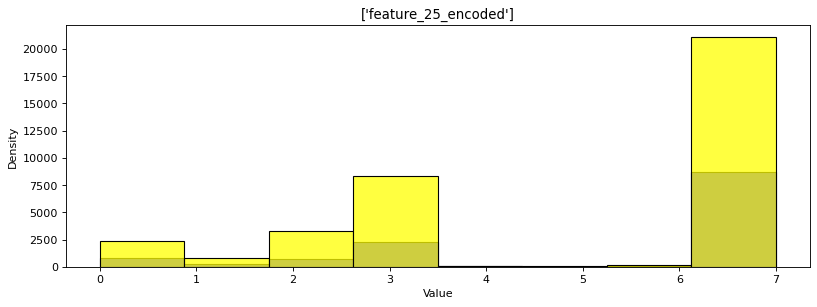

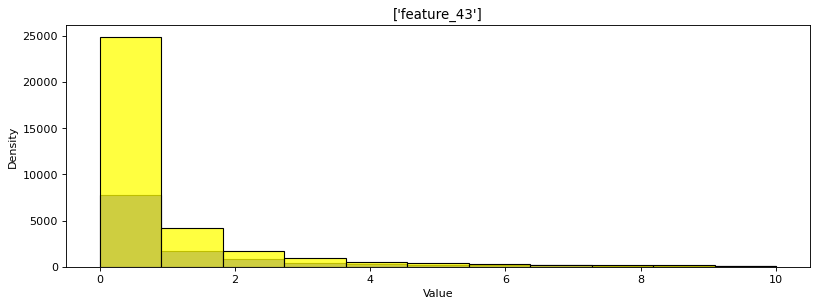

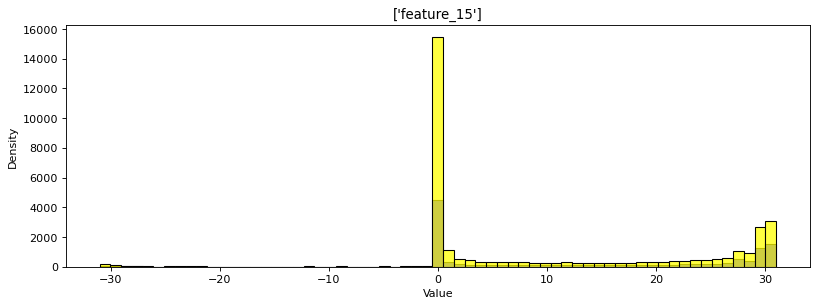

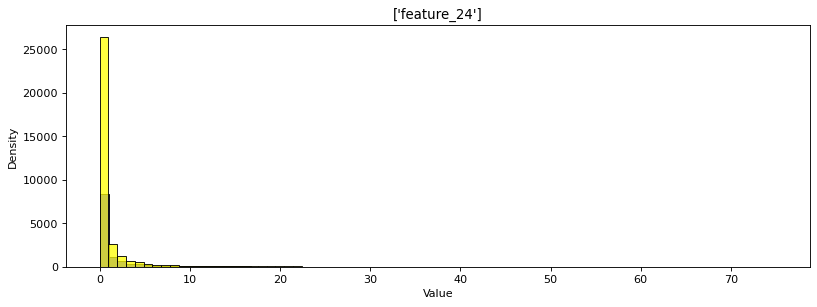

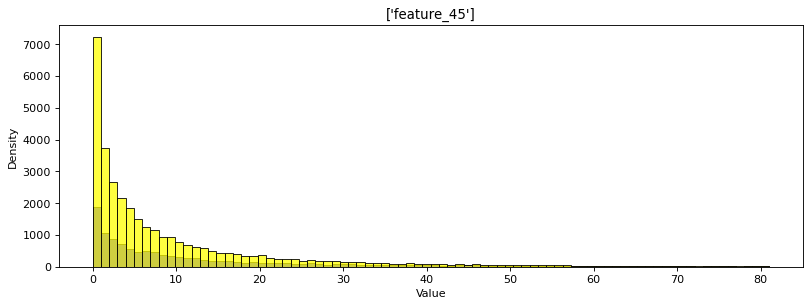

In [888]:
for feature in probablyCategorical.index:
#     = 'feature_45'
    plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')

    hist_bins = input_data[feature].nunique()
    df1 = input_data[input_data.target == 1][feature]
    df0 = input_data[input_data.target == 0][feature]

# plt.hist(df, color = 'blue', edgecolor = 'black',
#          bins = df.nunique())

# plt.hist(df, color = 'yellow', edgecolor = 'black',
#          bins = df.nunique())

    # seaborn histogram
#     sns.distplot(df1, hist=True, kde=False, 
#                  bins=hist_bins, color = 'blue',
#                  hist_kws={'edgecolor':'black'})
#     sns.distplot(df0, hist=True, kde=False, 
#                  bins=hist_bins, color = 'yellow',
#                  hist_kws={'edgecolor':'black'})
    sns.histplot(df1, kde=False, 
                 bins=hist_bins, color = 'blue')
    sns.histplot(df0, kde=False, 
                 bins=hist_bins, color = 'yellow')
    # Add labels
    plt.title([feature])
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()


#### Define categorical and noncategorical features

In [889]:
categoricalFeatures = ['feature_25_encoded']

In [891]:
nonCategoricalFeatures = (
    input_data.columns
    .drop(categoricalFeatures)
    .drop(ids).drop(['target'])
    .array
)
nonCategoricalFeatures

<PandasArray>
[         'feature_2',          'feature_3',          'feature_5',
          'feature_6',          'feature_8',          'feature_9',
         'feature_11',         'feature_12',         'feature_13',
         'feature_15',         'feature_17',         'feature_19',
         'feature_21',         'feature_23',         'feature_24',
         'feature_27',         'feature_28',         'feature_29',
         'feature_32',         'feature_33',         'feature_35',
         'feature_39',         'feature_40',         'feature_42',
         'feature_43',         'feature_45',         'feature_46',
         'feature_47',         'feature_49',      'feature_26_30',
       'feature_1_22',      'feature_20_44', 'feature_4_10_48_36',
       'feature_7_18',      'feature_31_34',      'feature_14_16']
Length: 36, dtype: object

## Visualize target distribution

In [898]:
features = input_data.columns.drop(ids).drop(['target'])
features

Index(['feature_2', 'feature_3', 'feature_5', 'feature_6', 'feature_8',
       'feature_9', 'feature_11', 'feature_12', 'feature_13', 'feature_15',
       'feature_17', 'feature_19', 'feature_21', 'feature_23', 'feature_24',
       'feature_27', 'feature_28', 'feature_29', 'feature_32', 'feature_33',
       'feature_35', 'feature_39', 'feature_40', 'feature_42', 'feature_43',
       'feature_45', 'feature_46', 'feature_47', 'feature_49',
       'feature_25_encoded', 'feature_26_30', 'feature_1_22', 'feature_20_44',
       'feature_4_10_48_36', 'feature_7_18', 'feature_31_34', 'feature_14_16'],
      dtype='object')

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


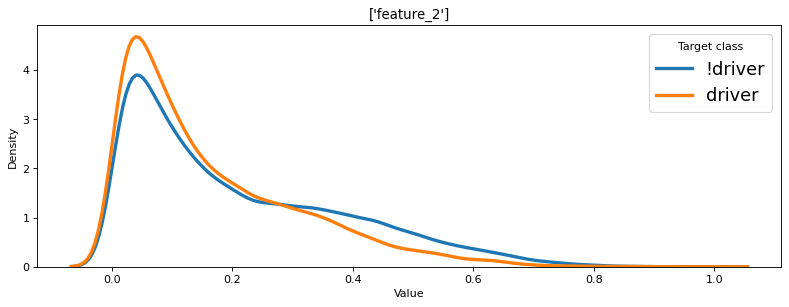

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


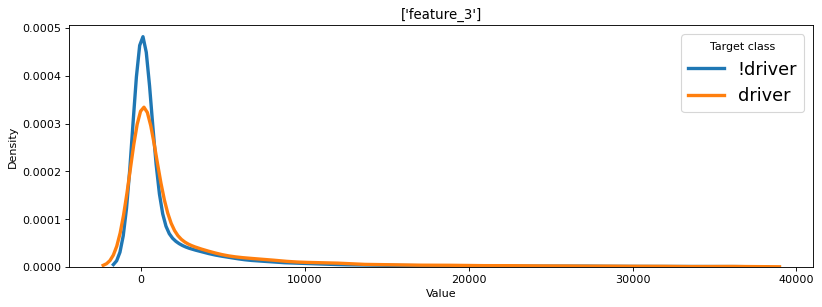

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


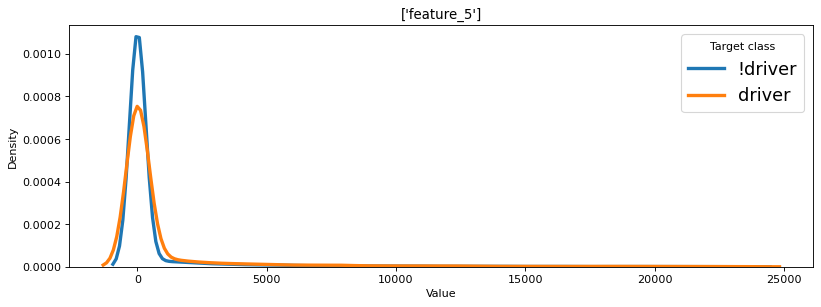

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


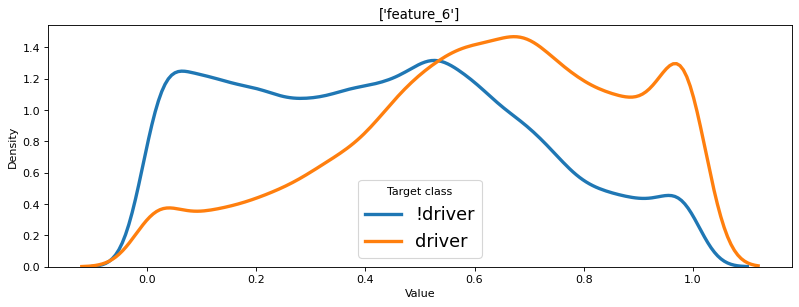

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


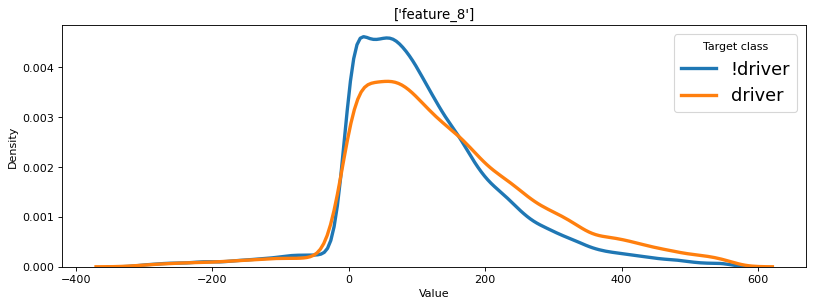

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


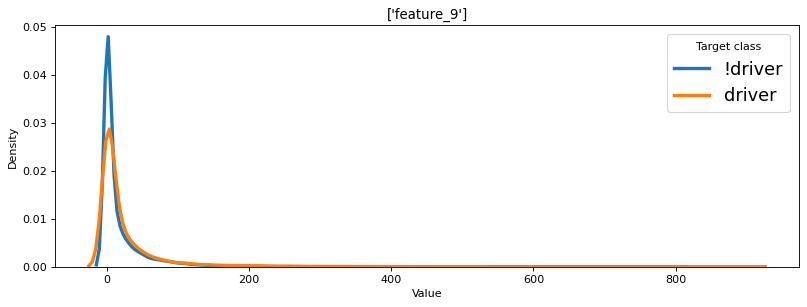

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


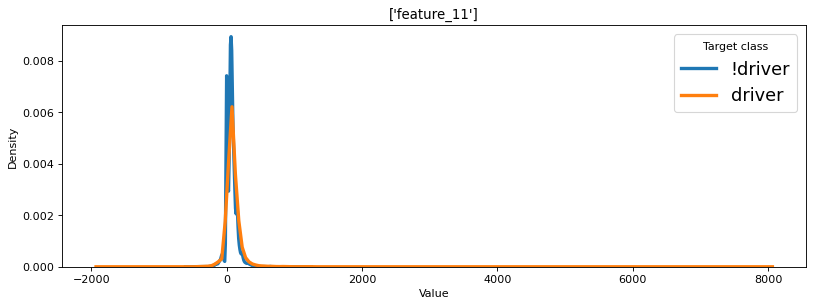

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


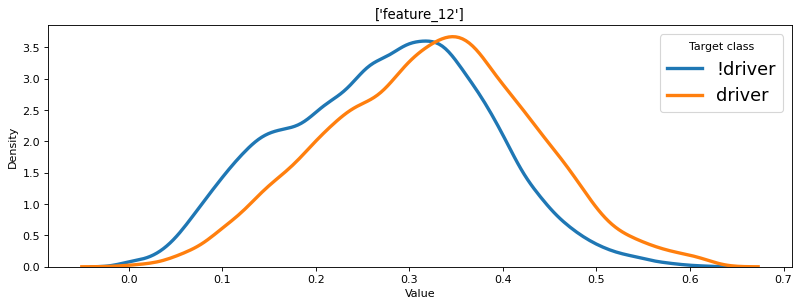

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


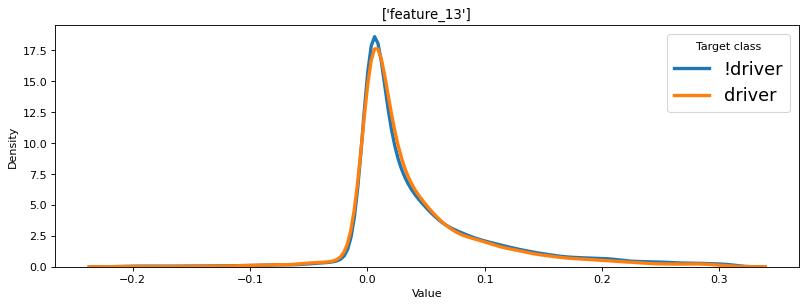

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


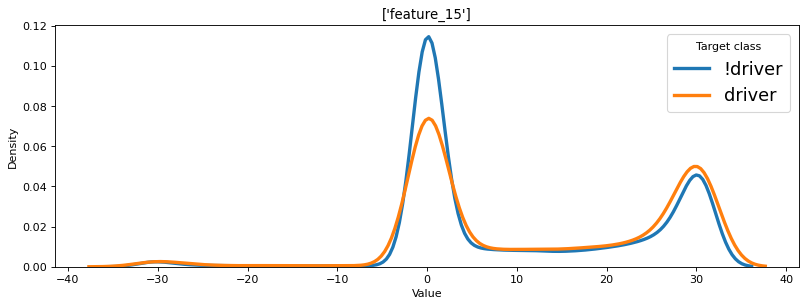

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


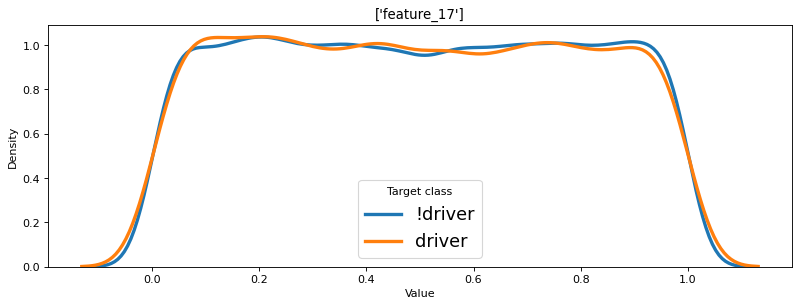

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


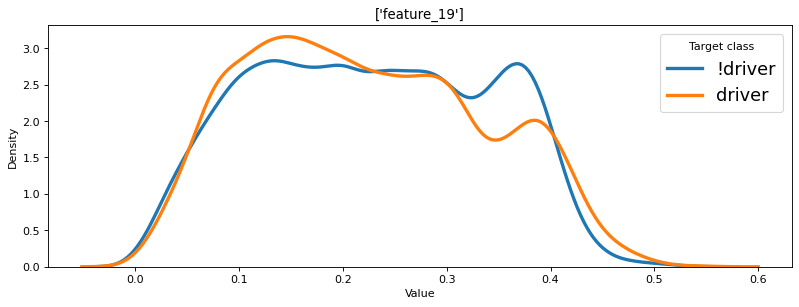

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


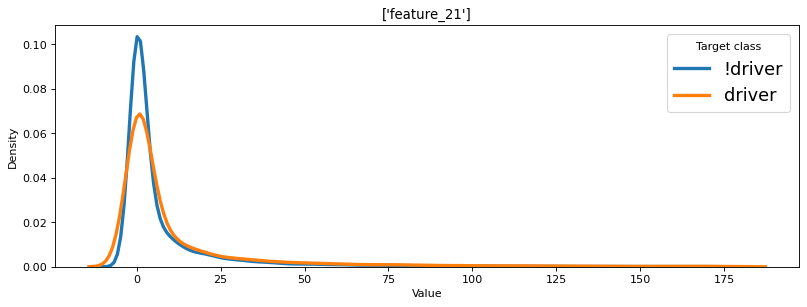

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


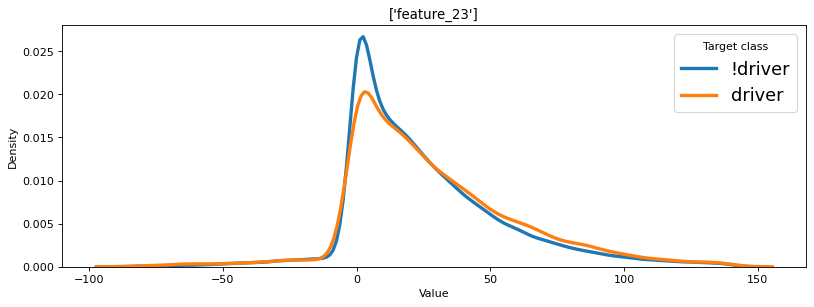

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


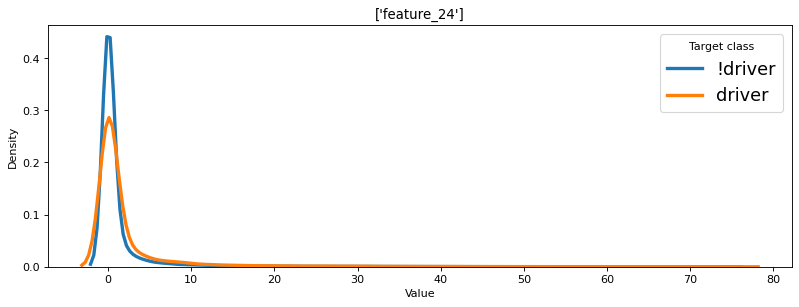

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


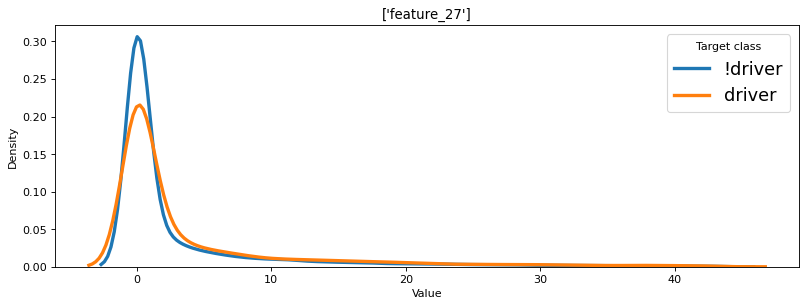

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


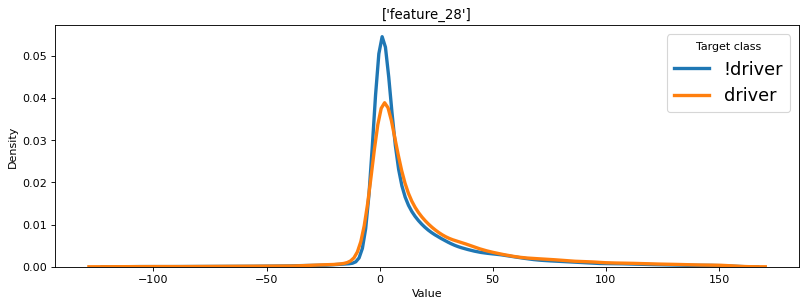

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


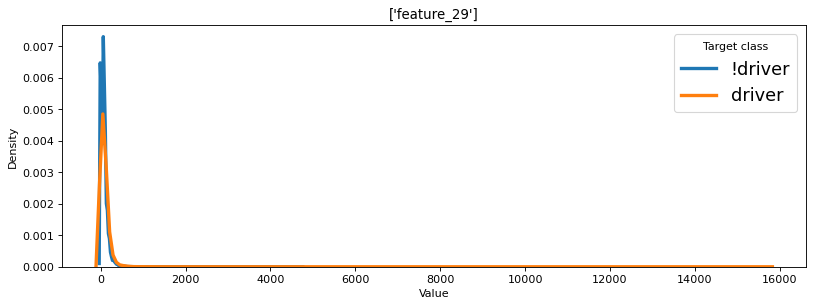

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


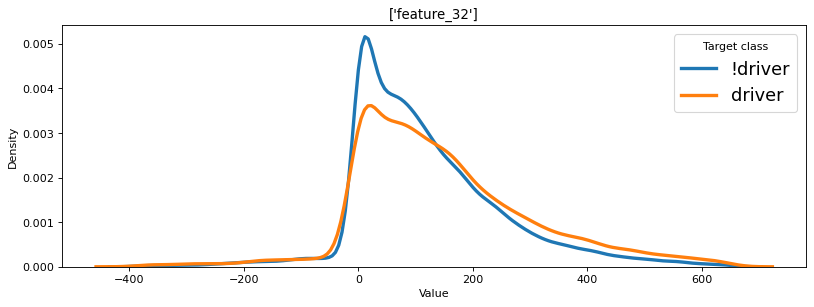

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


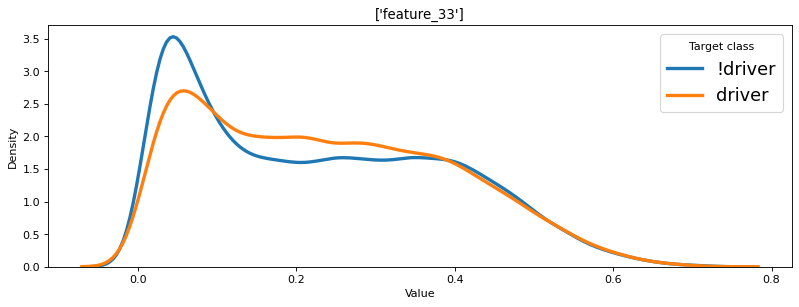

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


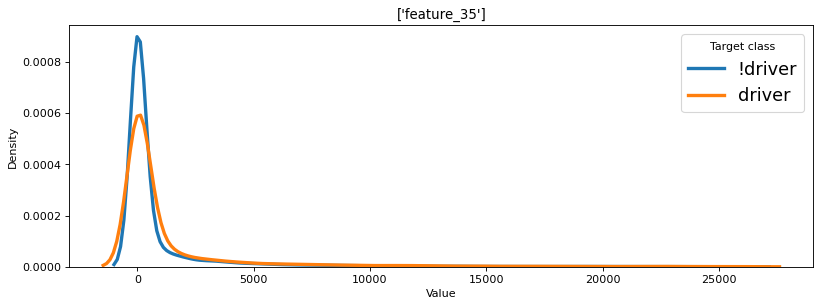

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


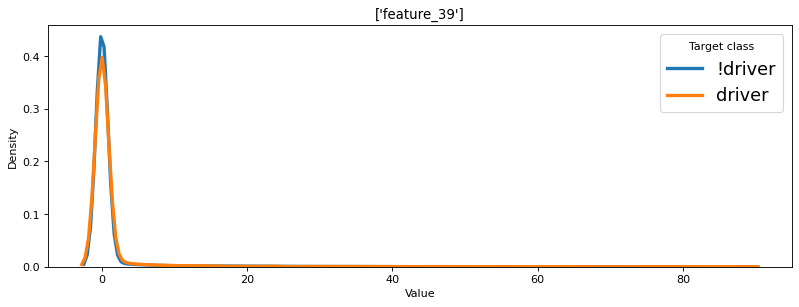

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


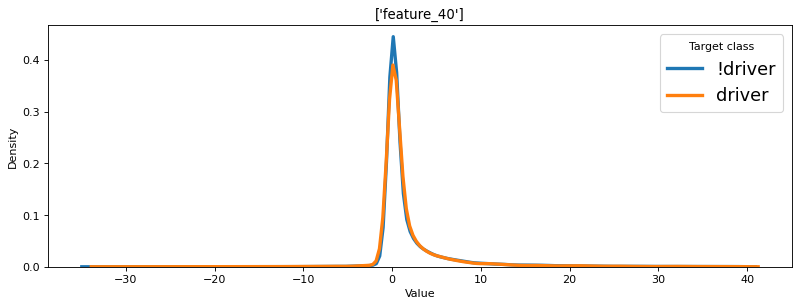

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


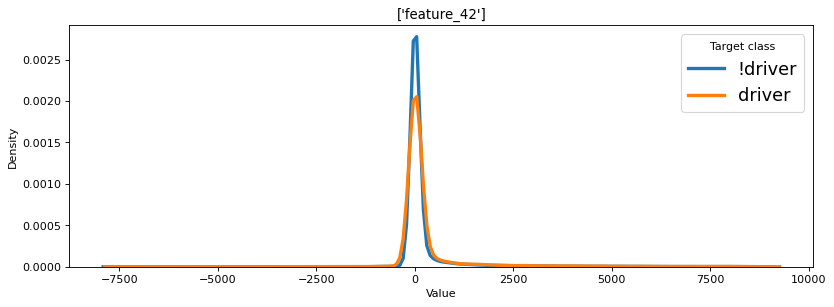

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


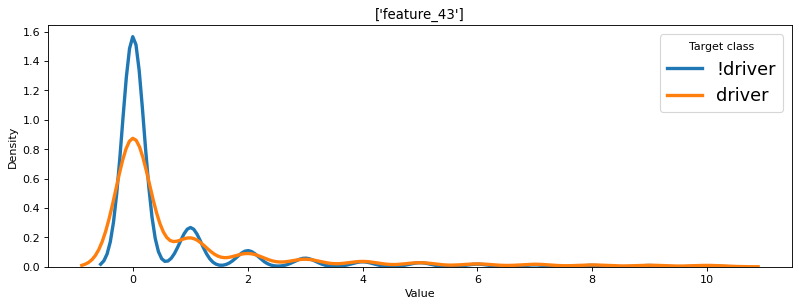

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


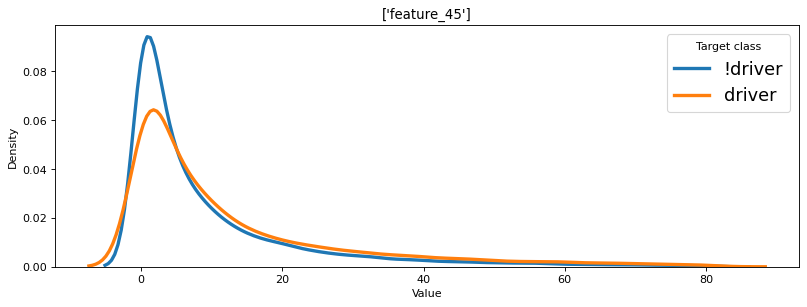

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


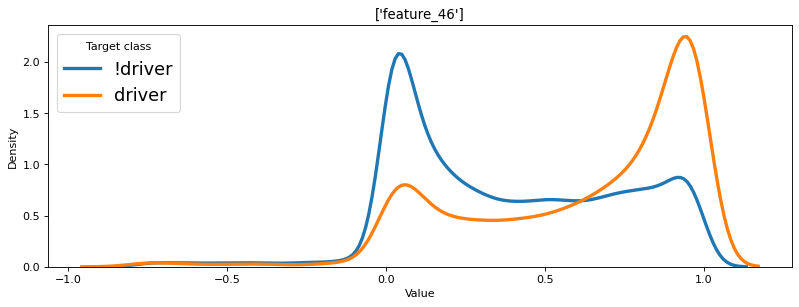

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


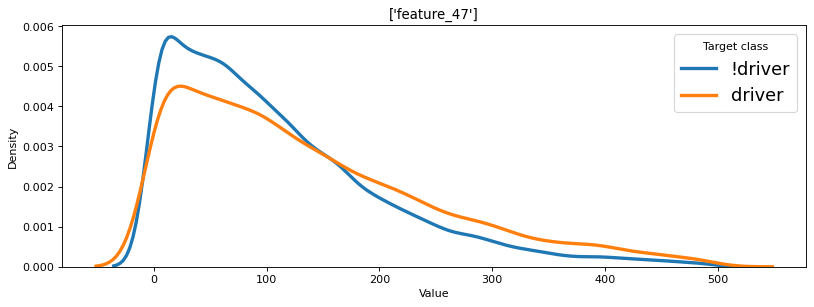

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


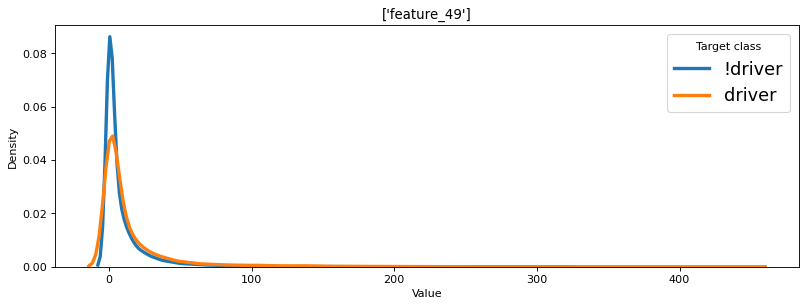

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


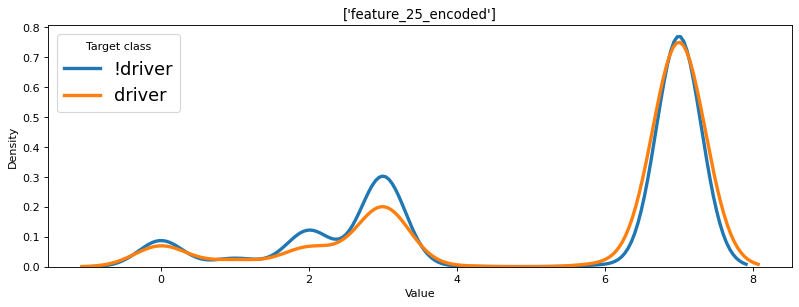

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


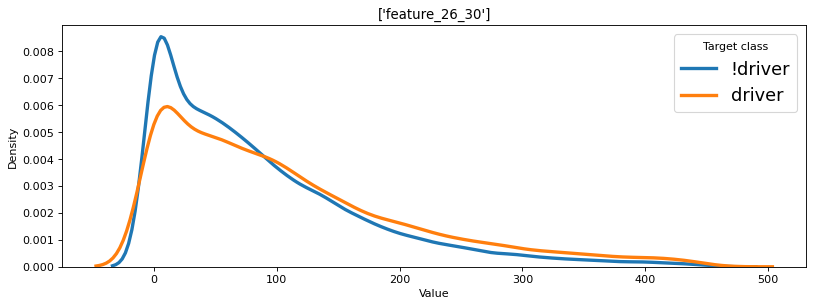

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


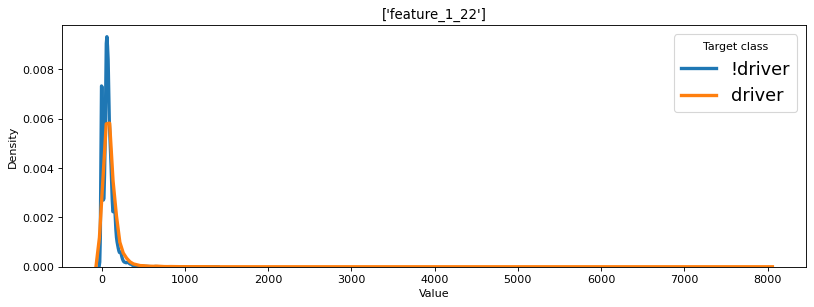

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


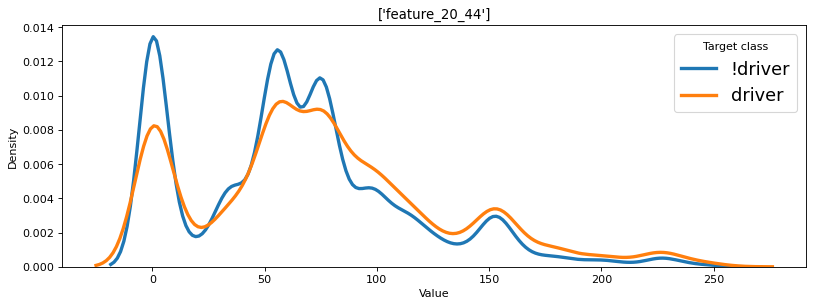

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


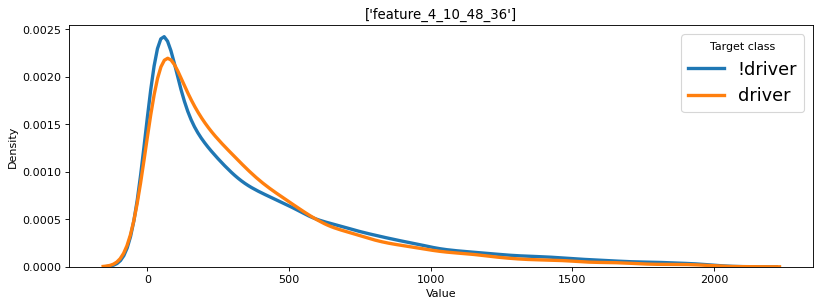

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


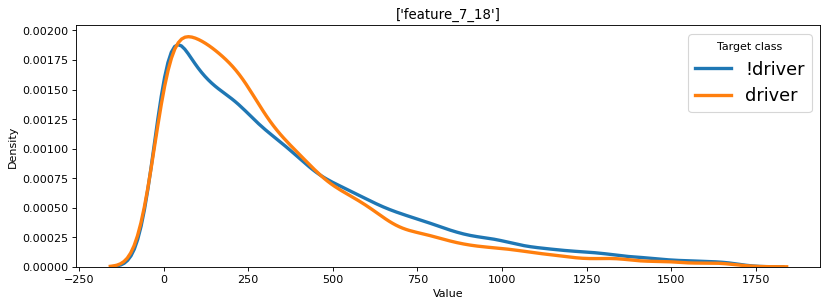

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


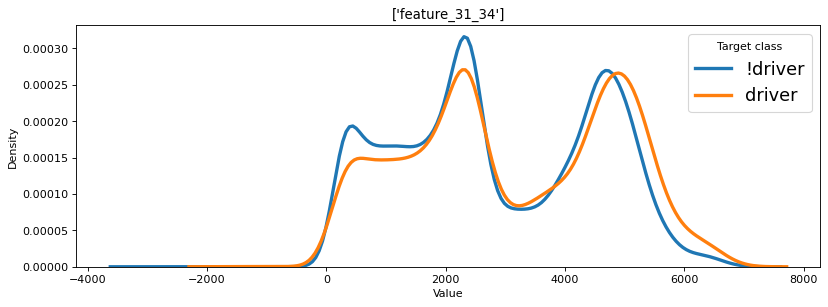

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


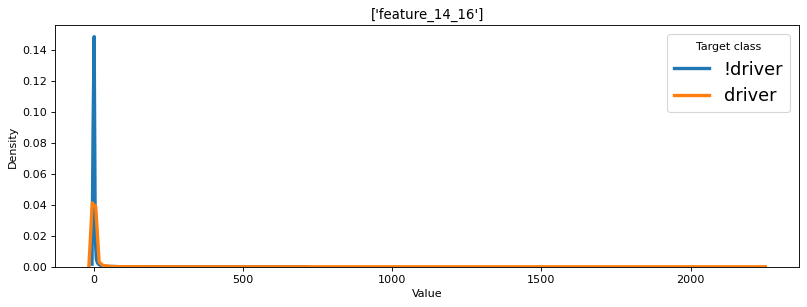

In [902]:
for feature in features:

    plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
#     ax = plt.subplot(4, 1, i + 1)
    sns.distplot(input_data[input_data.target == 0][feature], hist = False, kde = True,
                     kde_kws = {'linewidth': 3},
                     label = '!driver')

    sns.distplot(input_data[input_data.target == 1][feature], hist = False, kde = True,
                     kde_kws = {'linewidth': 3},
                     label = 'driver')

#     ax.hist(df['feature_10'], bins = int(180/binwidth),
#              color = 'blue', edgecolor = 'black')
    
#     # Title and labels
#     ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 30)
#     ax.set_xlabel('Delay (min)', size = 22)
#     ax.set_ylabel('Flights', size= 22)

    plt.legend(prop={'size': 16}, title = 'Target class')
    plt.title([feature])
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

In [ ]:
#replace feature_25 with dummies
#There is no NaNs 
feature_25_vals = pd.DataFrame({'feature_25':tabular_data.feature_25.unique()})
#add dummies
# feature_25_vals = feature_25_vals.reset_index().rename(columns = {'index':'feature_25_index'})
feature_25_vals = feature_25_vals.combine_first(pd.get_dummies(feature_25_vals.index, prefix='feature_25'))
#feature_25_vals

In [ ]:
#merge feature_25 dummies
cleaned_data = pd.merge(cleaned_data, feature_25_vals, how = 'left', on='feature_25')
#delete feature_25
cleaned_data = cleaned_data.drop(columns=['feature_25'], errors='ignore')
# cleaned_data